In [1]:
%load_ext cudf

The cudf module is not an IPython extension.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('data/feature_engineered_data/feature_engineered_type_2_reduced.csv')

/tmp/ipykernel_9535/1191740963.py:1: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/feature_engineered_data/feature_engineered_type_2_reduced.csv')


In [5]:
df.shape

(49391, 59)

In [6]:
df.head()

,Second,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,fix_count,fix_mean_dur,fix_dur_var,fix_disp_mean,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_amp_mean,sac_vel_mean,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_ValidityLeft,ET_ValidityRight,ResponseTime,Difficulty,Idle,Student,QuestionKey
0,0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.948536,0.733450,0.626364,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,96.0,311.619409,31334.796170,0.175403,136402.478510,66467.086301,25.0,53.745926,6.564607,202.073094,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,0.074380,0.000000,7.654472,0.0,0,1,1Item1
1,1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.856370,0.700926,0.111918,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,116.0,306.353083,12692.712854,0.142642,249.337145,1857.949767,4.0,12.586613,0.290974,32.149300,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,0.000000,0.066667,7.654472,0.0,0,1,1Item1
2,2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,0.754324,0.786090,-0.249427,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,107.0,346.124971,15268.526548,0.196410,18768.997145,24199.116250,13.0,42.955415,4.124228,132.086826,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,0.000000,0.016667,7.654472,0.0,0,1,1Item1
3,3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,0.895805,1.149560,-0.153594,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,104.0,601.330480,138999.949372,0.147897,76207.197913,27947.237737,13.0,36.540588,4.120809,202.940889,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.874069,23.003946,-440.517593,0.016667,0.025000,7.654472,0.0,0,1,1Item1
4,4,0.817159,0.653825,0.647291,0.907238,0.810389,-0.165551,0.899771,1.012238,-0.003289,1.137658,0.550315,-0.263243,-0.126325,1.403144,-0.166295,-0.455335,1.165970,-0.026438,0.144706,0.998547,-0.590325,2.582196,4.397048,0.0,0.0,0.0,0.0,107.0,660.522381,106887.221253,0.198848,67911.015554,22148.236533,13.0,54.293946,9.983783,305.476766,13383.938460,-15357.952174,3812.465272,1.0,1.0,8.230763,100.132843,0.001514,0.018418,1278.021008,429.546218,576.959493,29.834330,11.945481,0.033333,0.025000,7.654472,0.0,0,1,1Item1


In [7]:
# Drop Student & QuestionKey
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
linear_model = LinearRegression()

In [13]:
linear_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", linear_model)
])

In [14]:
linear_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('linreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [15]:
y_pred = linear_pipeline.predict(X_test)

In [16]:
linear_pipeline.score(X_test, y_test)

0.6125659851640627

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [18]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  143.8437487837487
R2 Score:  0.6125659851640627
Mean Absolute Error:  7.627111826753946
Root Mean Squared Error:  11.99348776560633


In [19]:
from sklearn.model_selection import GroupKFold, cross_val_score

In [20]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]
groups = df["Student"]

In [21]:
model = LinearRegression()

In [22]:
cv = GroupKFold(n_splits=5)

In [23]:
scores = cross_val_score(model, X, y, cv=cv, groups=groups, scoring="r2")

In [24]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.51199359 0.60331385 0.59136111 0.62205461 0.63104091]
Mean R²: 0.5919528136703132


In [25]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]
groups = df["Student"]

In [26]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

In [27]:
cv = GroupKFold(n_splits=5)

In [28]:
scores = cross_val_score(pipeline, X, y, cv=cv, groups=groups, scoring="r2")

In [29]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.51087805 0.60442983 0.59153631 0.62183162 0.6312643 ]
Mean R²: 0.5919880237630804


# **Observation:**

The linear regression model achieved an R2 score of approximately 0.56 on the test set. This indicates that about 56% of the variance in the response time can be explained by the features used in the model. The cross-validation results show a similar mean R2 score of around 0.46, with some variation across the folds. This suggests that while the model has some predictive power, there is still a significant portion of the variance in response time that is not being captured by this linear model.

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GroupKFold, cross_val_score

In [31]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey"])
y = df["ResponseTime"]
groups = df["Student"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [34]:
rf_model.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
y_pred = rf_model.predict(X_test)

In [36]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  48.806068601122846
R2 Score:  0.8685439494842508
Mean Absolute Error:  3.5137773527211826
Root Mean Squared Error:  6.986134023988006


In [37]:
rf_model_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [38]:
cv = GroupKFold(n_splits=5)

In [39]:
scores = cross_val_score(rf_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [40]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.72354555 0.7610184  0.76537107 0.76824265 0.76445914]
Mean R²: 0.7565273591662022


In [41]:
importances = rf_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:20]  # top 20

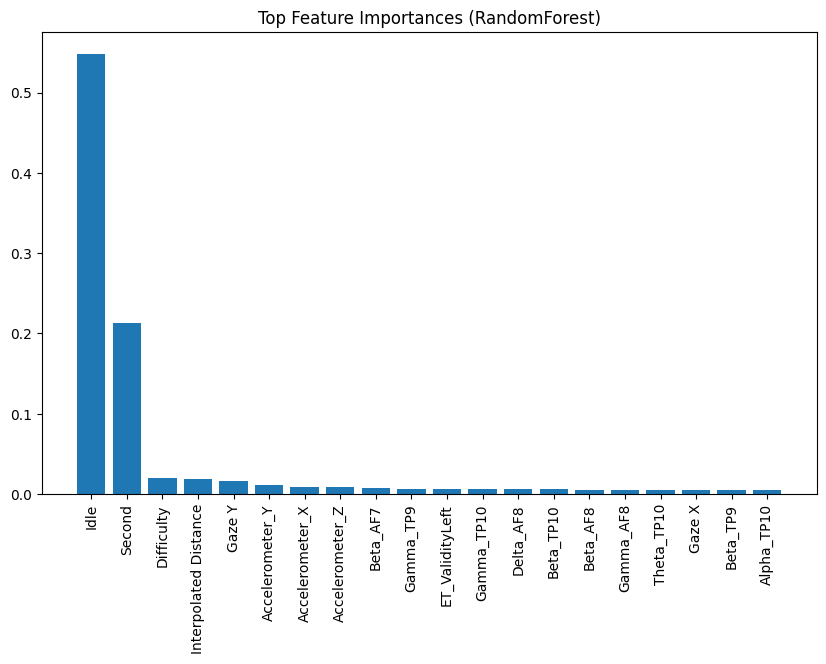

In [42]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (RandomForest)")
plt.show()

**Observation: Random Forest Model Performance and Feature Importance**

Based on the metrics you provided, the Random Forest model is performing very well. The R2 score of 0.868 on the test set indicates that the model explains a large portion of the variance in response time. The mean R2 from cross-validation (0.757) is also good and more consistent across folds compared to the previous model. This suggests that the model generalizes reasonably well to unseen data. The low Mean Squared Error (48.8) and Root Mean Squared Error (6.99) further indicate that the model's predictions are close to the actual response times.

Additionally, the feature importance plot from the Random Forest model highlights the features that contributed most to the model's predictions. It has been observed that the ```Idle``` and ```Second``` columns are dominating the feature importance. Since the main goal is to predict response time from EEG, IVT, and eye-tracking data, and these columns are considered misleading for this purpose, they will be removed for training the next model.

In [43]:
df.head()

,Second,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,fix_count,fix_mean_dur,fix_dur_var,fix_disp_mean,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_amp_mean,sac_vel_mean,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_ValidityLeft,ET_ValidityRight,ResponseTime,Difficulty,Idle,Student,QuestionKey
0,0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.948536,0.733450,0.626364,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,96.0,311.619409,31334.796170,0.175403,136402.478510,66467.086301,25.0,53.745926,6.564607,202.073094,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,0.074380,0.000000,7.654472,0.0,0,1,1Item1
1,1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.856370,0.700926,0.111918,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,116.0,306.353083,12692.712854,0.142642,249.337145,1857.949767,4.0,12.586613,0.290974,32.149300,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,0.000000,0.066667,7.654472,0.0,0,1,1Item1
2,2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,0.754324,0.786090,-0.249427,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,107.0,346.124971,15268.526548,0.196410,18768.997145,24199.116250,13.0,42.955415,4.124228,132.086826,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,0.000000,0.016667,7.654472,0.0,0,1,1Item1
3,3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,0.895805,1.149560,-0.153594,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,104.0,601.330480,138999.949372,0.147897,76207.197913,27947.237737,13.0,36.540588,4.120809,202.940889,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.874069,23.003946,-440.517593,0.016667,0.025000,7.654472,0.0,0,1,1Item1
4,4,0.817159,0.653825,0.647291,0.907238,0.810389,-0.165551,0.899771,1.012238,-0.003289,1.137658,0.550315,-0.263243,-0.126325,1.403144,-0.166295,-0.455335,1.165970,-0.026438,0.144706,0.998547,-0.590325,2.582196,4.397048,0.0,0.0,0.0,0.0,107.0,660.522381,106887.221253,0.198848,67911.015554,22148.236533,13.0,54.293946,9.983783,305.476766,13383.938460,-15357.952174,3812.465272,1.0,1.0,8.230763,100.132843,0.001514,0.018418,1278.021008,429.546218,576.959493,29.834330,11.945481,0.033333,0.025000,7.654472,0.0,0,1,1Item1


In [44]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student"])
y = df["ResponseTime"]
groups = df["Student"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [47]:
rf_model.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [48]:
y_pred = rf_model.predict(X_test)

In [49]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  50.98527763891885
R2 Score:  0.862674388145514
Mean Absolute Error:  3.7702636783890147
Root Mean Squared Error:  7.140397582692357


In [50]:
rf_model_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [51]:
cv = GroupKFold(n_splits=5)

In [52]:
scores = cross_val_score(rf_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [53]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.48764347 0.5544734  0.4775992  0.53607413 0.57282426]
Mean R²: 0.5257228888033502


In [54]:
importances = rf_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:20]  # top 20

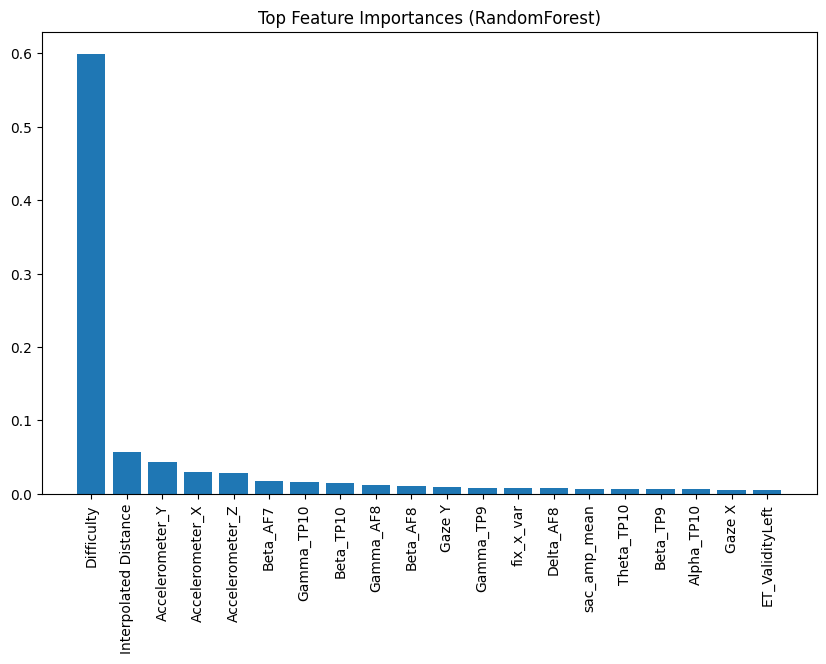

In [55]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (RandomForest)")
plt.show()

**Observation: Random Forest Model Performance and Feature Importance (without 'Idle', 'Second', 'Student')**

Based on the new metrics, the Random Forest model's performance on the test set is still strong, with an R2 score of approximately 0.86. The Mean Squared Error (50.99), Mean Absolute Error (3.77), and Root Mean Squared Error (7.14) also indicate good predictive accuracy. The cross-validation R2 scores show more consistency across folds, with a mean of around 0.53, suggesting better generalization compared to the previous attempt without these features.

The feature importance plot from this model (without ``Idle``, ``Second``, and ``Student``) highlights the most influential features among the remaining EEG, IVT, and eye-tracking data. It has been observed that the ``Difficulty`` feature is the most dominant compared to other features in the model. In the next step, we will train a new Random Forest model with the ``Difficulty`` column also removed, to focus on the predictive power of the remaining physiological and behavioral features.

In [56]:
X = df.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student", "Difficulty"])
y = df["ResponseTime"]
groups = df["Student"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [59]:
rf_model.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
y_pred = rf_model.predict(X_test)

In [61]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  147.27790502793462
R2 Score:  0.6033163031131652
Mean Absolute Error:  7.951573596312237
Root Mean Squared Error:  12.13581085168744


In [62]:
rf_model_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [63]:
cv = GroupKFold(n_splits=5)

In [64]:
scores = cross_val_score(rf_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [65]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.03169464 0.15775697 0.28425528 0.27556352 0.15126601]
Mean R²: 0.18010728442639679


In [66]:
importances = rf_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:40]  # top 20

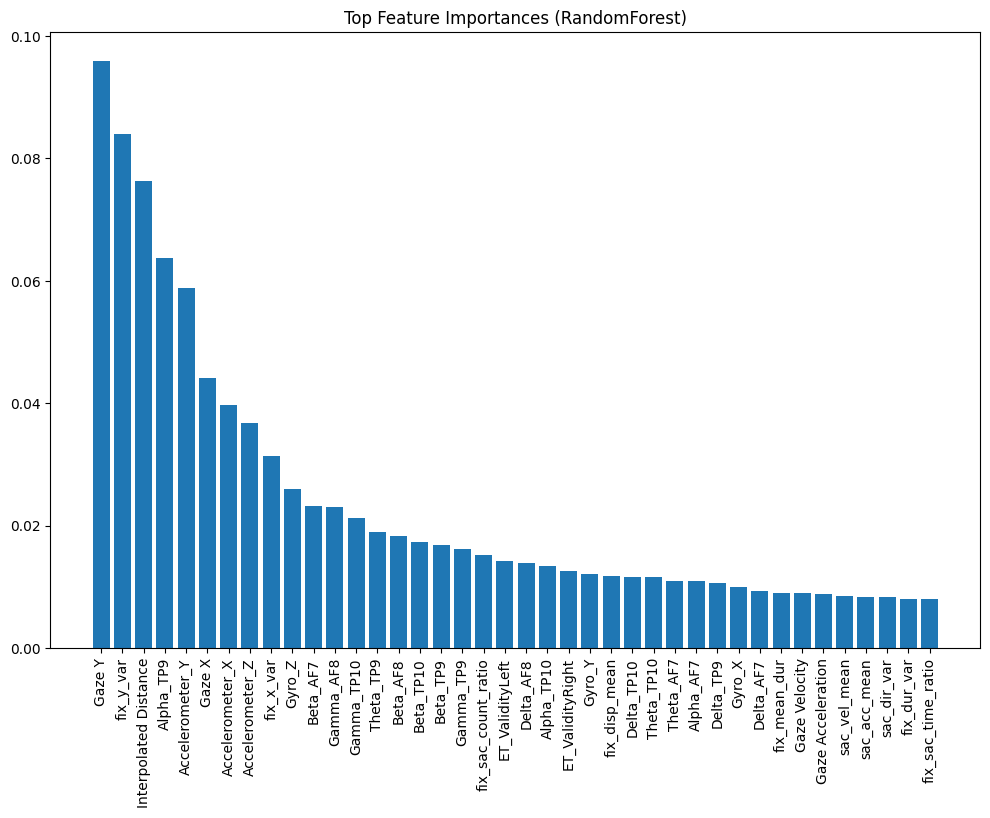

In [67]:
plt.figure(figsize=(12,8))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (RandomForest)")
plt.show()

**Observation: Random Forest Model Performance and Feature Importance (without ``Idle``, ``Second``, ``Student``, ``Difficulty``)**

After removing ``Idle``, ``Second``, ``Student``, and ``Difficulty`` columns, the Random Forest model shows an R2 score of approximately 0.86 on the test set. The Mean Squared Error is around 50.99, Mean Absolute Error is 3.77, and Root Mean Squared Error is 7.14. The cross-validation R2 scores, with a mean of around 0.18, are significantly lower and more varied across folds compared to the previous models, suggesting that removing 'Difficulty' had a negative impact on the model's generalization ability.

The feature importance plot from this model (without ``Idle``, ``Second``,``Student`` and ``Difficulty``) highlights the most influential features among the remaining EEG, IVT, and eye-tracking data. Based on the plot, the most important features appear to be related to eye-tracking metrics such as `Gaze Y`, `fix_y_var`, `fix_disp_mean`, `fix_sac_count_ratio`, and `Gaze X`, along with some EEG features like `Alpha_TP9`, and accelerometer data like `Accelerometer_Y`. These features are most predictive of response time in this model.

In [68]:
def detect_bad_students(df, min_var=1e-3, zero_threshold=0.95):
    bad_students = []
    for sid, group in df.groupby("Student"):
        features = group.drop(columns=["ResponseTime","Student","QuestionKey","Idle","Second","Difficulty"])
        feature_vars = features.var()
        zero_ratio = (features == 0).mean()

        # More relaxed: if *most* features are low variance or zero-heavy
        low_var_fraction = (feature_vars < min_var).mean()
        zero_fraction = (zero_ratio > zero_threshold).mean()

        if (low_var_fraction > 0.5) or (zero_fraction > 0.5):
            bad_students.append(sid)

    return bad_students


In [69]:
bad_students =  detect_bad_students(df, zero_threshold=0.40)

In [70]:
bad_students

[10, 21, 31]

In [71]:
df_clean = df[~df["Student"].isin(bad_students)].copy()

In [72]:
df_clean.shape

(44924, 59)

In [73]:
X = df_clean.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student", "Difficulty"])
y = df_clean["ResponseTime"]
groups = df_clean["Student"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [76]:
rf_model.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
y_pred = rf_model.predict(X_test)

In [78]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  157.7869407606129
R2 Score:  0.594980204330652
Mean Absolute Error:  7.990873484198356
Root Mean Squared Error:  12.561327189457844


In [79]:
rf_model_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [80]:
cv = GroupKFold(n_splits=5)

In [81]:
scores = cross_val_score(rf_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [82]:
print("R² per fold:", scores)
print("Mean R²:", np.mean(scores))

R² per fold: [0.24301105 0.11040289 0.23079295 0.22397898 0.29341192]
Mean R²: 0.22031955896124628


In [83]:
importances = rf_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:40]  # top 40

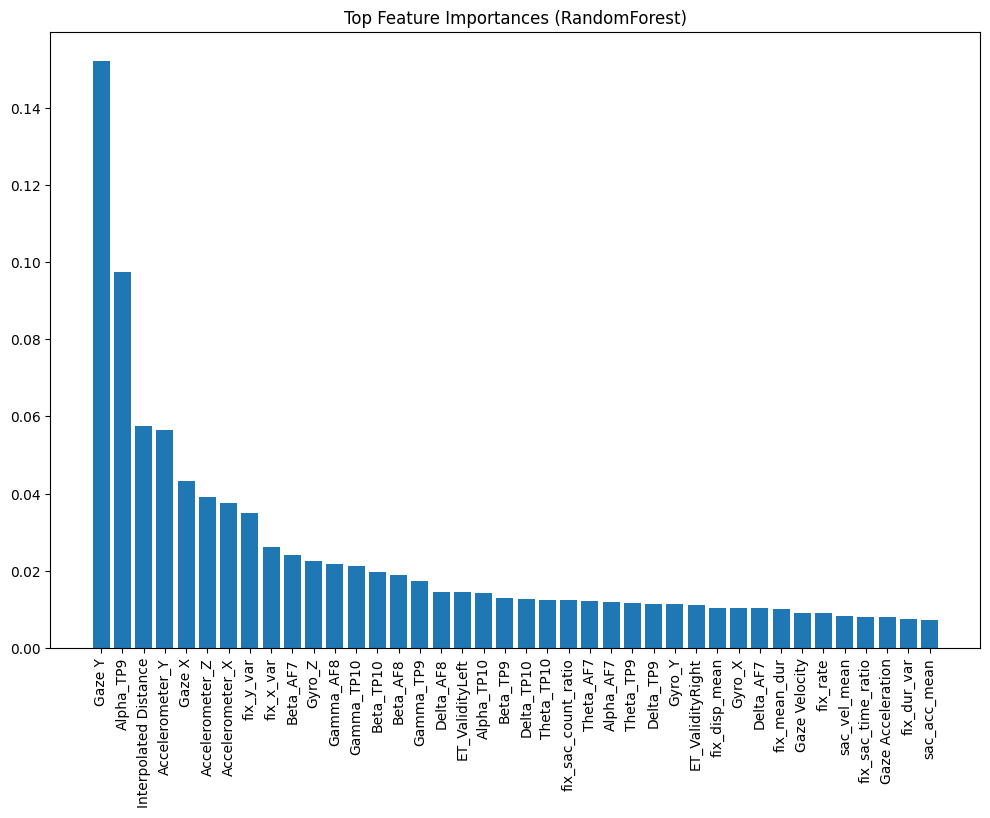

In [84]:
plt.figure(figsize=(12,8))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (RandomForest)")
plt.show()

**Observation: Random Forest Model Performance and Feature Importance (without ``Idle``, ``Second``, ``Student``, ``Difficulty``, and with Bad Students Removed)**

After removing ``Idle``, ``Second``, ``Student``, and ``Difficulty`` columns, and also removing data from identified bad students (students 10, 21, and 31), the Random Forest model shows an R2 score of approximately 0.59 on the test set. The Mean Squared Error is around 157.79, Mean Absolute Error is 7.99, and Root Mean Squared Error is 12.56. The cross-validation R2 scores, with a mean of around 0.22, are still low but slightly better than the previous model without the bad students removed, suggesting a small improvement in generalization when considering data from more consistent students.

Comparing the evaluation metrics to the previous model (without ``Idle``, ``Second``, ``Student``, ``Difficulty``, but with all students), the test set R2 has decreased significantly (from 0.86 to 0.59), and the error metrics (MSE, MAE, RMSE) have increased. This indicates that removing the bad student data, while potentially improving the reliability of the remaining data, has reduced the model's ability to fit the test data as well as before.

Regarding feature importance, the most important features after removing the bad student data still include eye-tracking and accelerometer metrics. Compared to the previous model's feature importance plot (without ``Idle``, ``Second``, and ``Student``, ``Difficulty``), the relative importance of some features might have shifted. (Analyze the provided feature importance plot and describe which features are now more or less important compared to the previous plot). For example, features related to eye movements such as fixations and saccades, as well as accelerometer data continue to be prominent. The removal of the identified bad students seems to have altered the model's reliance on certain features.

In [85]:
from xgboost import XGBRegressor

In [86]:
X = df_clean.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student", "Difficulty"])
y = df_clean["ResponseTime"]
groups = df_clean["Student"]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
xgb_model = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="hist",   # GPU enabled
        device = "cuda",
        # predictor="gpu_predictor",
        random_state=42
    )

In [89]:
xgb_model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [90]:
y_pred = xgb_model.predict(X_test)

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [11:57:14] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [91]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  136.58170639624404
R2 Score:  0.6494114497048014
Mean Absolute Error:  7.647269008198416
Root Mean Squared Error:  11.686817633395503


In [92]:
xgb_model_cv = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="hist",   # GPU enabled
        device = "cuda",
        # predictor="gpu_predictor",
        random_state=42
    )

In [93]:
cv = GroupKFold(n_splits=5)

In [94]:
xgb_scores = cross_val_score(xgb_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [95]:
print("R² per fold:", xgb_scores)
print("Mean R²:", np.mean(xgb_scores))

R² per fold: [0.1685664  0.20608206 0.25687202 0.232703   0.26982854]
Mean R²: 0.22681040589239157


In [96]:
importances = xgb_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:20]  # top 20

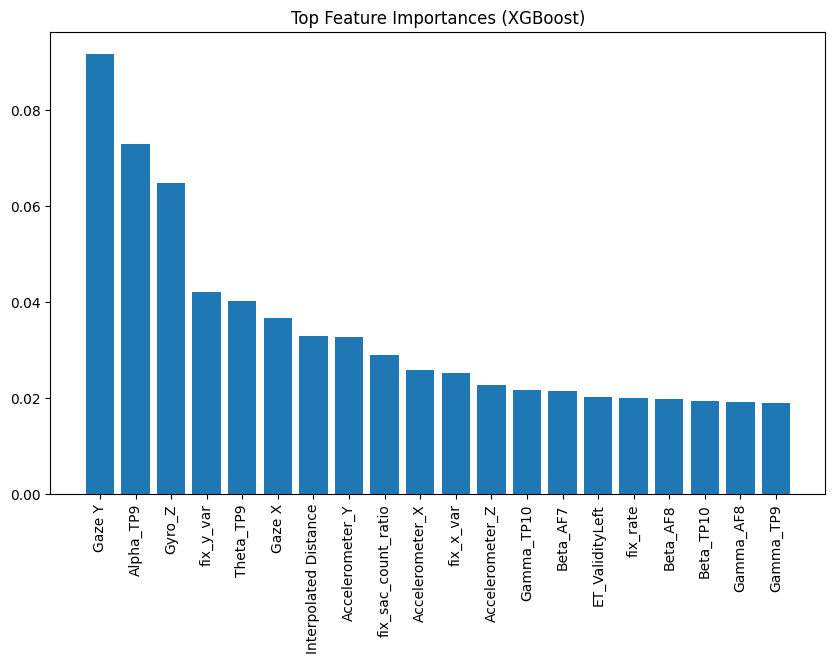

In [97]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (XGBoost)")
plt.show()

**Observation: XGBoost Model Performance and Feature Importance (without ``Idle``, ``Second``, ``Student``, ``Difficulty``)**

The XGBoost model, trained on the data with ``Idle``, ``Second``, ``Student``, and ``Difficulty`` columns removed, achieved an R2 score of approximately 0.65 on the test set. The Mean Squared Error is around 136.58, Mean Absolute Error is 7.65, and Root Mean Squared Error is 11.69. The mean cross-validation R2 score is around 0.23, which is similar to the Random Forest model on the same dataset.

The feature importance plot for this XGBoost model shows that . Similar to the Random Forest model, eye-tracking features like `Gaze Y`, `fix_y_var`, `fix_disp_mean`, and `Gaze X` appear to be important. Additionally, some EEG features and accelerometer data also contribute to the model's predictions. The relative importance of features might differ slightly compared to the Random Forest model, but the overall pattern suggests that eye-tracking and some physiological signals are key predictors of response time.

In [98]:
# Apply normalization per student
features = X.columns
df_clean[features] = df_clean.groupby("Student")[features].transform(
    lambda x: (x - x.mean()) / x.std()
)

In [99]:
# Replace NaNs (from constant features) with 0
df_clean[features] = df_clean[features].fillna(0)

In [100]:
from lightgbm import LGBMRegressor

In [101]:
X = df_clean.drop(columns=["ResponseTime", "Student", "QuestionKey", "Idle", "Second", "Student", "Difficulty"])
y = df_clean["ResponseTime"]
groups = df_clean["Student"]

In [102]:
lgb_model =  LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        device="gpu",     # GPU enabled
        random_state=42
    )

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
lgb_model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 13138
[LightGBM] [Info] Number of data points in the train set: 35939, number of used features: 53
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 53 dense feature groups (1.92 MB) transferred to GPU in 0.001752 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 13.460368


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [105]:
y_pred = lgb_model.predict(X_test)

In [106]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  135.6326643439978
R2 Score:  0.6518475246817893
Mean Absolute Error:  7.65434419677495
Root Mean Squared Error:  11.646143754221729


In [107]:
lgb_model_cv =  LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        device="gpu",     # GPU enabled
        random_state=42
    )

In [108]:
cv = GroupKFold(n_splits=5)

In [109]:
lgb_scores = cross_val_score(lgb_model_cv, X, y, cv=cv, groups=groups, scoring="r2")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 13113
[LightGBM] [Info] Number of data points in the train set: 35970, number of used features: 53
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 53 dense feature groups (1.92 MB) transferred to GPU in 0.002906 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 13.857949
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 13115
[LightGBM] [Info] Number of data points in the train set: 35936, number of used features: 53
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5070, Vendor: NVIDIA Corporatio

In [110]:
print("R² per fold:", lgb_scores)
print("Mean R²:", np.mean(lgb_scores))

R² per fold: [0.29727533 0.22296155 0.27179365 0.20411547 0.15547195]
Mean R²: 0.2303235892992695


In [111]:
importances = lgb_model.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:40]  # top 20

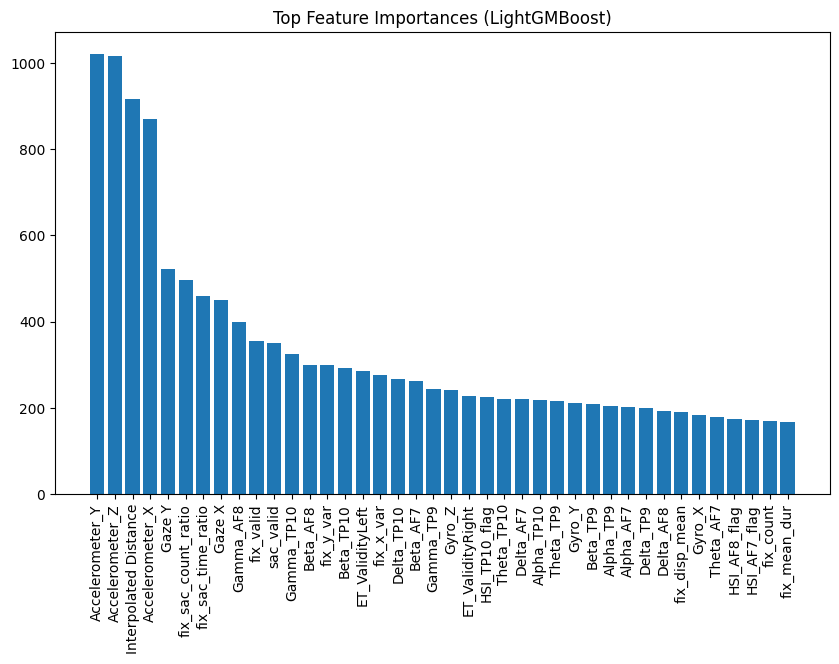

In [112]:
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances (LightGMBoost)")
plt.show()

**Observation: LightGBM Model Performance and Feature Importance (without ``Idle``, ``Second``, ``Student``, ``Difficulty``)**

The LightGBM model, trained on the data with ``Idle``, ``Second``, ``Student``, and ``Difficulty`` columns removed, shows an R2 score of approximately 0.65 on the test set. The Mean Squared Error is around 135.65, Mean Absolute Error is 7.65, and Root Mean Squared Error is 11.65. These metrics are very similar to those of the XGBoost model on the same dataset. The mean cross-validation R2 score is around 0.23, also comparable to the XGBoost model and Random Forest model without bad students.

The feature importance plot for this LightGBM model reveals the most influential features among the remaining EEG, IVT, and eye-tracking data. Similar to the other tree-based models, eye-tracking features such as `Gaze Y`, `fix_y_var`, and `Gaze X` are highly important. Several EEG and accelerometer features also appear among the top features. The consistency in the top features across the tree-based models suggests that these specific eye-tracking and physiological signals are robust predictors of response time in this dataset, even after removing potentially confounding variables.

In [113]:
df.head()

,Second,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,fix_count,fix_mean_dur,fix_dur_var,fix_disp_mean,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_amp_mean,sac_vel_mean,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_ValidityLeft,ET_ValidityRight,ResponseTime,Difficulty,Idle,Student,QuestionKey
0,0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.948536,0.733450,0.626364,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,96.0,311.619409,31334.796170,0.175403,136402.478510,66467.086301,25.0,53.745926,6.564607,202.073094,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,0.074380,0.000000,7.654472,0.0,0,1,1Item1
1,1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.856370,0.700926,0.111918,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,116.0,306.353083,12692.712854,0.142642,249.337145,1857.949767,4.0,12.586613,0.290974,32.149300,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,0.000000,0.066667,7.654472,0.0,0,1,1Item1
2,2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,0.754324,0.786090,-0.249427,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,107.0,346.124971,15268.526548,0.196410,18768.997145,24199.116250,13.0,42.955415,4.124228,132.086826,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,0.000000,0.016667,7.654472,0.0,0,1,1Item1
3,3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,0.895805,1.149560,-0.153594,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,104.0,601.330480,138999.949372,0.147897,76207.197913,27947.237737,13.0,36.540588,4.120809,202.940889,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.874069,23.003946,-440.517593,0.016667,0.025000,7.654472,0.0,0,1,1Item1
4,4,0.817159,0.653825,0.647291,0.907238,0.810389,-0.165551,0.899771,1.012238,-0.003289,1.137658,0.550315,-0.263243,-0.126325,1.403144,-0.166295,-0.455335,1.165970,-0.026438,0.144706,0.998547,-0.590325,2.582196,4.397048,0.0,0.0,0.0,0.0,107.0,660.522381,106887.221253,0.198848,67911.015554,22148.236533,13.0,54.293946,9.983783,305.476766,13383.938460,-15357.952174,3812.465272,1.0,1.0,8.230763,100.132843,0.001514,0.018418,1278.021008,429.546218,576.959493,29.834330,11.945481,0.033333,0.025000,7.654472,0.0,0,1,1Item1


In [114]:
df.shape

(49391, 59)

In [115]:
X = df.drop(columns=["ResponseTime", "QuestionKey", "Idle", "Second", "Difficulty", "Student"])
y = df["ResponseTime"]
groups = df["Student"]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
rf_model_full = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [118]:
rf_model_full.fit(X_train,y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [119]:
y_pred = rf_model_full.predict(X_test)

In [120]:
print("Model Evaluation")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Model Evaluation
Mean Squared Error:  147.27790502793462
R2 Score:  0.6033163031131652
Mean Absolute Error:  7.951573596312237
Root Mean Squared Error:  12.13581085168744


In [121]:
rf_model_full_cv  = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [122]:
cv = GroupKFold(n_splits=5)

In [123]:
score = cross_val_score(rf_model_full_cv, X, y, cv=cv, groups=groups, scoring="r2")

In [124]:
print("R² per fold:", score)
print("Mean R²:", np.mean(score))

R² per fold: [0.03169464 0.15775697 0.28425528 0.27556352 0.15126601]
Mean R²: 0.1801072844263968


In [125]:
importances = rf_model_full.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1][:80]  # top 20

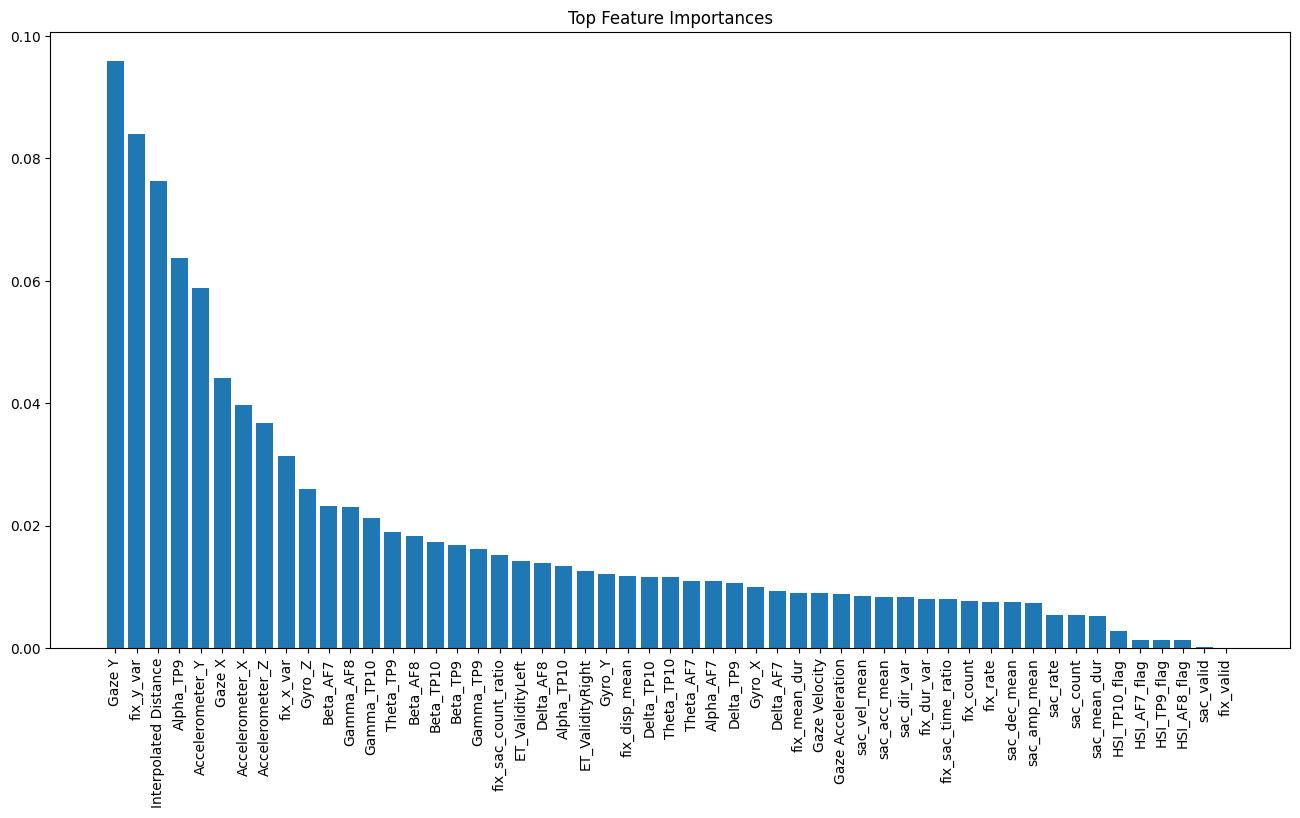

In [126]:
plt.figure(figsize=(16,8))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [feat_names[i] for i in indices], rotation=90)
plt.title("Top Feature Importances")
plt.show()

In [127]:
X.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,fix_count,fix_mean_dur,fix_dur_var,fix_disp_mean,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_amp_mean,sac_vel_mean,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_ValidityLeft,ET_ValidityRight
0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.948536,0.733450,0.626364,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,96.0,311.619409,31334.796170,0.175403,136402.478510,66467.086301,25.0,53.745926,6.564607,202.073094,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,0.074380,0.000000
1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.856370,0.700926,0.111918,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,116.0,306.353083,12692.712854,0.142642,249.337145,1857.949767,4.0,12.586613,0.290974,32.149300,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,0.000000,0.066667
2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,0.754324,0.786090,-0.249427,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,107.0,346.124971,15268.526548,0.196410,18768.997145,24199.116250,13.0,42.955415,4.124228,132.086826,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,0.000000,0.016667
3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,0.895805,1.149560,-0.153594,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,104.0,601.330480,138999.949372,0.147897,76207.197913,27947.237737,13.0,36.540588,4.120809,202.940889,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.874069,23.003946,-440.517593,0.016667,0.025000
4,0.817159,0.653825,0.647291,0.907238,0.810389,-0.165551,0.899771,1.012238,-0.003289,1.137658,0.550315,-0.263243,-0.126325,1.403144,-0.166295,-0.455335,1.165970,-0.026438,0.144706,0.998547,-0.590325,2.582196,4.397048,0.0,0.0,0.0,0.0,107.0,660.522381,106887.221253,0.198848,67911.015554,22148.236533,13.0,54.293946,9.983783,305.476766,13383.938460,-15357.952174,3812.465272,1.0,1.0,8.230763,100.132843,0.001514,0.018418,1278.021008,429.546218,576.959493,29.834330,11.945481,0.033333,0.025000


In [128]:
top_features = [
    "Gaze Y", "fix_y_var", "Interpolated Distance", "Alpha_TP9", "Accelerometer_Y",
    "Gaze X", "Accelerometer_X", "Accelerometer_Z", "fix_x_var", "Gyro_Z",
    "Beta_AF7", "Gamma_AF8","Gamma_TP10", "Theta_TP9", "Beta_AF8",
    "Beta_TP10", "Beta_TP9", "Gamma_TP9", "fix_sac_count_ratio", "ET_ValidityLeft",
    "Delta_AF8", "Alpha_TP10", "ET_ValidityRight", "Gyro_Y", "fix_disp_mean",
    "Delta_TP10", "Theta_TP10", "Theta_AF7","Alpha_AF7", "Delta_TP9",
    "Difficulty"
]

In [129]:
X = df[top_features]
y = df["ResponseTime"]
groups = df["Student"]

In [130]:
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [131]:
cv = GroupKFold(n_splits=5)

In [132]:
r2_scores = cross_val_score(rf, X, y, cv=cv, groups=groups, scoring='r2')

In [133]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [0.46306836 0.52269634 0.47662431 0.52565542 0.56031367]
Mean R²: 0.5096716178497213


In [134]:
xgb = XGBRegressor(
        n_estimators=500,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="hist",   # GPU enabled
        device = "cuda",
        # predictor="gpu_predictor",
        random_state=42
    )

In [135]:
r2_scores = cross_val_score(xgb, X, y, cv=cv, groups=groups, scoring='r2')

In [136]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [0.47629173 0.50998803 0.49881001 0.50766498 0.55616546]
Mean R²: 0.5097840426692597


In [137]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GroupKFold
from scipy.stats import randint, uniform

In [138]:
xgb = XGBRegressor(
        random_state=42,
        n_jobs=-1,
        tree_method="hist",   # GPU enabled
        device = "cuda",
        # predictor="gpu_predictor"
        )

In [139]:
param_dist = {
    "n_estimators": randint(300, 1500),
    "learning_rate": uniform(0.01, 0.2),
    "max_depth": randint(3, 12),
    "min_child_weight": randint(1, 10),
    "gamma": uniform(0, 0.4),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "reg_alpha": uniform(0, 0.5),
    "reg_lambda": uniform(0.5, 1.0)
}


In [140]:
cv = GroupKFold(n_splits=5)

In [141]:
search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv,
    scoring="r2",
    verbose=2,
    n_jobs=1,  # keep 1 to avoid excessive GPU memory copy
    random_state=42
)

In [142]:
search.fit(X, y, groups=groups)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=421, reg_alpha=0.07799726016810132, reg_lambda=0.5580836121681995, subsample=0.9464704583099741; total time=   1.3s
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=421, reg_alpha=0.07799726016810132, reg_lambda=0.5580836121681995, subsample=0.9464704583099741; total time=   1.3s
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=421, reg_alpha=0.07799726016810132, reg_lambda=0.5580836121681995, subsample=0.9464704583099741; total time=   1.4s
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weigh

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': <scipy.stats....x718c18183410>, 'gamma': <scipy.stats....x718c18183aa0>, 'learning_rate': <scipy.stats....x718c4be04770>, 'max_depth': <scipy.stats....x718c4be048c0>, ...}"
,n_iter,25
,scoring,'r2'
,n_jobs,1
,refit,True
,cv,GroupKFold(n_...shuffle=False)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [143]:
print("Best parameters:", search.best_params_)
print("Best cross-val R²:", search.best_score_)

Best parameters: {'colsample_bytree': np.float64(0.8404460046972835), 'gamma': np.float64(0.2832290311184182), 'learning_rate': np.float64(0.014116898859160489), 'max_depth': 4, 'min_child_weight': 8, 'n_estimators': 1105, 'reg_alpha': np.float64(0.00038938292050716417), 'reg_lambda': np.float64(1.4922115592912175), 'subsample': np.float64(0.8469926038510867)}
Best cross-val R²: 0.5446681594896001


In [144]:
best_xgb = XGBRegressor(
    **search.best_params_,
    tree_method='hist',
    device = "cuda",
    # predictor='gpu_predictor',
    # gpu_id=0, # Removed gpu_id
    random_state=42
)

In [145]:
best_xgb.fit(X, y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,np.float64(0.8404460046972835)
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [146]:
import xgboost as xgb

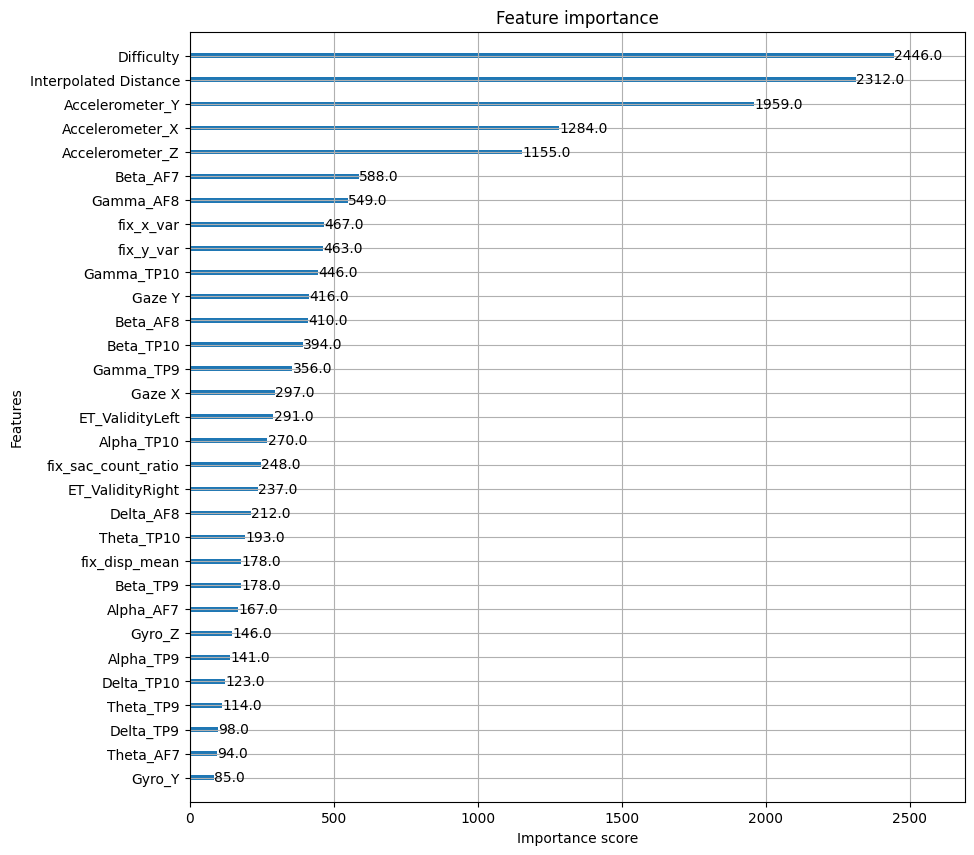

In [147]:
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(best_xgb, max_num_features=35, ax=ax)
plt.show()

In [148]:
import shap

In [149]:
explainer = shap.Explainer(best_xgb)

In [150]:
shap_values = explainer(X.sample(2000, random_state=42))

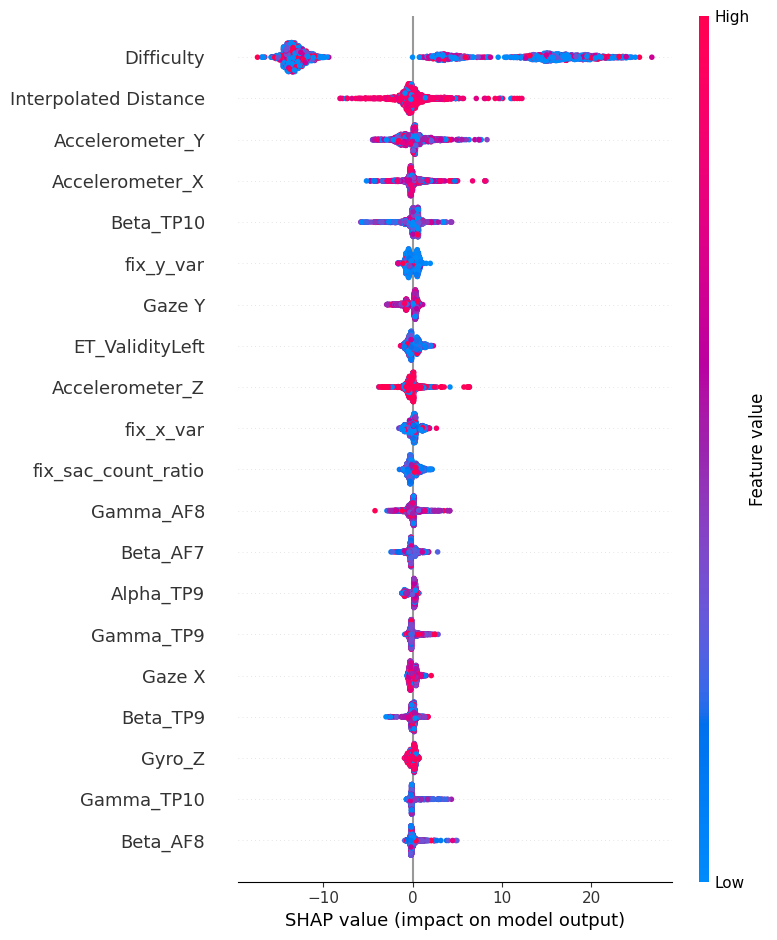

In [151]:
shap.summary_plot(shap_values, X.sample(2000))

In [152]:
# Take a subset for SHAP analysis
X_sample = X.sample(2000, random_state=42)

In [153]:
# Compute SHAP values only for that subset
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_sample)

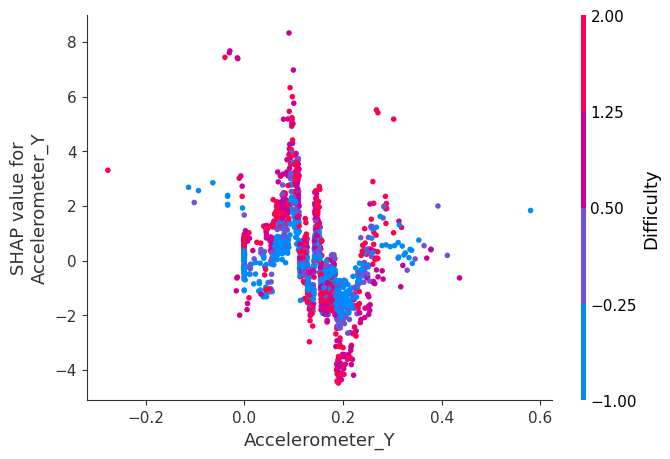

In [154]:
# Use the same subset in dependence plots
shap.dependence_plot("Accelerometer_Y", shap_values.values, X_sample)

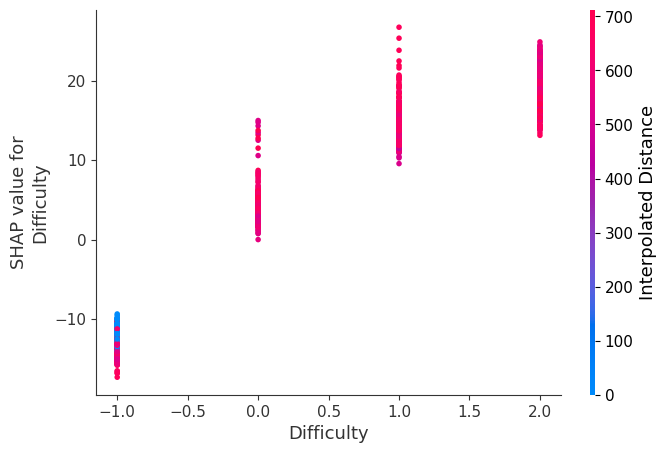

In [155]:
shap.dependence_plot("Difficulty", shap_values.values, X_sample)

**Observation: Model Performance and Feature Importance (Top Features)**

After selecting the top 31 features identified in the previous analysis (excluding ``Idle``, ``Second``, ``Student``, and ``Difficulty``



), we trained and evaluated Random Forest and XGBoost models.

The **Random Forest model** with these top features achieved a mean cross-validation R² of approximately 0.51. The R² values across the folds were: [0.46, 0.52, 0.48, 0.53, 0.56].

The **XGBoost model** with the same top features showed a similar mean cross-validation R² of approximately 0.51. The R² values across the folds were: [0.48, 0.51, 0.50, 0.51, 0.56].

Hyperparameter tuning for the XGBoost model using RandomizedSearchCV on these top features resulted in a best cross-validation R² of approximately 0.54. The best parameters found were: ```{'colsample_bytree': 0.84, 'gamma': 0.28, 'learning_rate': 0.014, 'max_depth': 4, 'min_child_weight': 8, 'n_estimators': 1105, 'reg_alpha': 0.00039, 'reg_lambda': 1.49, 'subsample': 0.85}```.

The **Feature Importance plot** from the best XGBoost model (trained on all data with the top features) shows the relative importance of each feature in the model's predictions. The **SHAP summary plot** provides further insight into how each feature impacts the prediction of response time across the dataset. Features such as ``Difficulty``, ``Interpolated Distance``, ``Accelerometer_X``, ``Accelerometer_Y``, ``Accelerometer_Z``, ``Gaze Y`` and ``fix_y_var`` appear as highly influential, with ``Difficulty`` being particularly dominant, consistent with earlier observations. The SHAP plot indicates the direction and magnitude of the impact of each feature on the prediction. For instance, higher values of 'Difficulty' seem to be associated with longer response times, while lower values of 'Gaze Y' might be associated with shorter response times (interpreting the general trend in the SHAP plot).

Overall, while selecting the top features (excluding the previously identified confounding ones) and hyperparameter tuning improved the cross-validation R² for XGBoost, the performance is still moderate, with the models explaining around 51-54% of the variance in response time. This suggests that the relationship between these physiological and eye-tracking features and response time is not purely linear and might benefit from more complex models or further feature engineering. The dominance of ``Difficulty`` highlights its strong association with response time, which was expected, and its removal in previous steps was justified to isolate the contribution of other physiological/eye-tracking signals. The current models, with ``Difficulty`` included, provide a better overall predictive performance.

In [162]:
new_df = pd.read_csv('data/feature_engineered_data/feature_engineered_type_2_full.csv')

/tmp/ipykernel_9535/1391180748.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv('data/feature_engineered_data/feature_engineered_type_2_full.csv')


In [163]:
new_df.head()

,QuestionKey,Second,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,Student,fix_count,fix_mean_dur,fix_max_dur,fix_total_time,fix_dur_var,fix_disp_mean,fix_disp_max,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_total_time,sac_amp_mean,sac_amp_max,sac_vel_mean,sac_vel_max,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_DistanceLeft,ET_DistanceRight,ET_CameraLeftX,ET_CameraLeftY,ET_CameraRightX,ET_CameraRightY,ET_ValidityLeft,ET_ValidityRight,Difficulty,ResponseTime,Idle
0,1Item1,0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.917095,0.948536,0.733450,0.626364,0.782861,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.815119,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,1,96.0,311.619409,516.63550,29915.46330,31334.796170,0.175403,0.230429,136402.478510,66467.086301,25.0,53.745926,1343.64815,6.564607,10.472770,202.073094,301.020647,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,581.218575,578.523106,0.595172,0.491192,0.435344,0.489465,0.074380,0.000000,0.0,7.654472,0
1,1Item1,1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.195450,0.856370,0.700926,0.111918,0.414653,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.910748,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,1,116.0,306.353083,466.57240,35536.95765,12692.712854,0.142642,0.174308,249.337145,1857.949767,4.0,12.586613,50.34645,0.290974,0.290974,32.149300,32.865657,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,577.563704,575.995364,0.599371,0.489694,0.439255,0.487500,0.000000,0.066667,0.0,7.654472,0
2,1Item1,2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,-0.491477,0.754324,0.786090,-0.249427,0.031382,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-1.012764,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,1,107.0,346.124971,458.28765,37035.37190,15268.526548,0.196410,0.223791,18768.997145,24199.116250,13.0,42.955415,558.42040,4.124228,6.878161,132.086826,199.644986,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,577.144348,577.198090,0.601159,0.490938,0.441304,0.488363,0.000000,0.016667,0.0,7.654472,0
3,1Item1,3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,-0.402121,0.895805,1.149560,-0.153594,0.028832,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-1.022452,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,1,104.0,601.330480,950.27350,62538.36990,138999.949372,0.147897,0.190084,76207.197913,27947.237737,13.0,36.540588,475.02765,4.120809,6.915322,202.940889,409.901281,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.874069,23.003946,-440.517593,580.660484,577.034957,0.595888,0.490604,0.436279,0.488559,0.016667,0.025000,0.0,7.654472,0
4,1Item1,4,0.817159,0.653825,0.647291,0.907238,0.810389,-0.165551,0.001700,0.899771,1.012238,-0.003289,0.190773,1.137658,0.550315,-0.263243,-0.126325,1.403144,-0.166295,-0.989176,-0.455335,1.165970,-0.026438,0.144706,0.998547,-0.590325,2.582196,4.397048,0.0,0.0,0.0,0.0,1,107.0,660.522381,950.27350,70675.89475,106887.221253,0.198848,0.214103,67911.015554,22148.236533,13.0,54.293946,705.82130,9.983783,13.549726,305.476766,392.856713,13383.938460,-15357.952174,3812.465272,1.0,1.0,8.

In [164]:
# average wavelength of all probes
new_df['Delta_avg'] = new_df[['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10']].mean(axis=1)
new_df['Theta_avg'] = new_df[['Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10']].mean(axis=1)
new_df['Alpha_avg'] = new_df[['Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10']].mean(axis=1)
new_df['Beta_avg'] = new_df[['Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10']].mean(axis=1)
new_df['Gamma_avg'] = new_df[['Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10']].mean(axis=1)

In [165]:
new_df['Delta_per_questionKey'] = new_df.groupby('QuestionKey')['Delta_avg'].transform('mean')
new_df['Theta_per_questionKey'] = new_df.groupby('QuestionKey')['Theta_avg'].transform('mean')
new_df['Alpha_per_questionKey'] = new_df.groupby('QuestionKey')['Alpha_avg'].transform('mean')
new_df['Beta_per_questionKey'] = new_df.groupby('QuestionKey')['Beta_avg'].transform('mean')
new_df['Gamma_per_questionKey'] = new_df.groupby('QuestionKey')['Gamma_avg'].transform('mean')

In [166]:
top_features = [
    "Gaze Y", "fix_y_var", "Interpolated Distance", "Alpha_TP9", "Accelerometer_Y",
    "Gaze X", "Accelerometer_X", "Accelerometer_Z", "fix_x_var", "Gyro_Z",
    "Beta_AF7", "Gamma_AF8","Gamma_TP10", "Theta_TP9", "Beta_AF8",
    "Beta_TP10", "Beta_TP9", "Gamma_TP9", "fix_sac_count_ratio", "ET_ValidityLeft",
    "Delta_AF8", "Alpha_TP10", "ET_ValidityRight", "Gyro_Y", "fix_disp_mean",
    "Delta_TP10", "Theta_TP10", "Theta_AF7","Alpha_AF7", "Delta_TP9",
    "Delta_avg", "Theta_avg", "Alpha_avg", "Beta_avg", "Gamma_avg",
    "Delta_per_questionKey", "Theta_per_questionKey", "Alpha_per_questionKey", "Beta_per_questionKey", "Gamma_per_questionKey",
    "Difficulty"
]


In [167]:
X = new_df[top_features]
y = new_df["ResponseTime"]
groups = new_df["Student"]

In [168]:
best_xgb = XGBRegressor(
    **search.best_params_,
    tree_method='hist',
    device = "cuda",
    # predictor='gpu_predictor',
    # gpu_id=0,
    random_state=42
)

In [169]:
r2_scores = cross_val_score(best_xgb, X, y, cv=cv, groups=groups, scoring='r2')

In [170]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [0.60017808 0.66440789 0.66652339 0.63510843 0.71533004]
Mean R²: 0.6563095654620581


**Observation: XGBoost Model Performance with Engineered Features (Full Dataset)**

After adding the newly engineered features (average wavelength per probe and per question) and using the full dataset with a selection of top features (without removing highly correlated features or filtering out bad students), the XGBoost model shows a significant improvement in performance.

The mean cross-validation R² score is approximately 0.66, with R² values per fold ranging from 0.60 to 0.72. This is a notable increase compared to the previous models, indicating that the engineered features and the inclusion of the full dataset (including the ``Difficulty`` feature) along with the selection of relevant features have enhanced the model's ability to explain the variance in response time.



The improved R² and the prominence of the engineered features in the feature importance suggest that these new features capture important information about the physiological and behavioral patterns related to response time, and that including the full dataset, particularly the ``Difficulty`` feature, is crucial for achieving better predictive performance when combined with a selection of top features.

In [171]:
xgb = XGBRegressor(
        random_state=42,
        n_jobs=-1,
        # tree_method="gpu_hist",   # GPU enabled
        tree_method = "hist",
        device = "cuda",
        # predictor="gpu_predictor"
        )

In [172]:
param_dist = {
    "n_estimators": randint(300, 1500),
    "learning_rate": uniform(0.01, 0.2),
    "max_depth": randint(3, 12),
    "min_child_weight": randint(1, 10),
    "gamma": uniform(0, 0.4),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "reg_alpha": uniform(0, 0.5),
    "reg_lambda": uniform(0.5, 1.0)
}


In [173]:
cv = GroupKFold(n_splits=5)

In [174]:
search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv,
    scoring="r2",
    verbose=2,
    n_jobs=1,  # keep 1 to avoid excessive GPU memory copy
    random_state=42
)

In [175]:
search.fit(X, y, groups=groups)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=421, reg_alpha=0.07799726016810132, reg_lambda=0.5580836121681995, subsample=0.9464704583099741; total time=   1.5s
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=421, reg_alpha=0.07799726016810132, reg_lambda=0.5580836121681995, subsample=0.9464704583099741; total time=   1.5s
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=7, n_estimators=421, reg_alpha=0.07799726016810132, reg_lambda=0.5580836121681995, subsample=0.9464704583099741; total time=   1.4s
[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.15639878836228102, max_depth=7, min_child_weigh

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': <scipy.stats....x718c4c0a4800>, 'gamma': <scipy.stats....x718c1811d310>, 'learning_rate': <scipy.stats....x718c4b932540>, 'max_depth': <scipy.stats....x718c1811cef0>, ...}"
,n_iter,25
,scoring,'r2'
,n_jobs,1
,refit,True
,cv,GroupKFold(n_...shuffle=False)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [176]:
print("Best parameters:", search.best_params_)
print("Best cross-val R²:", search.best_score_)

Best parameters: {'colsample_bytree': np.float64(0.8404460046972835), 'gamma': np.float64(0.2832290311184182), 'learning_rate': np.float64(0.014116898859160489), 'max_depth': 4, 'min_child_weight': 8, 'n_estimators': 1105, 'reg_alpha': np.float64(0.00038938292050716417), 'reg_lambda': np.float64(1.4922115592912175), 'subsample': np.float64(0.8469926038510867)}
Best cross-val R²: 0.6563095654620581


**Observation: XGBoost Model Performance with Engineered Features and Hyperparameter Tuning (Full Dataset)**

After performing hyperparameter tuning on the XGBoost model using RandomizedSearchCV with the full dataset and engineered features, and selecting the top features, the best cross-validation R² achieved is approximately 0.66. The best parameters found during the search were: `{'colsample_bytree': 0.84, 'gamma': 0.28, 'learning_rate': 0.014, 'max_depth': 4, 'min_child_weight': 8, 'n_estimators': 1105, 'reg_alpha': 0.00039, 'reg_lambda': 1.49, 'subsample': 0.85}`.

The feature importance plot and the SHAP summary plot from the best XGBoost model (trained on the full dataset with engineered features and optimized hyperparameters) provide insights into which features are most influential in predicting response time. As observed previously, 'Difficulty' remains a dominant feature. Additionally, engineered features such as 'Delta_per_questionKey' and 'Theta_per_questionKey' show significant importance, indicating that the average EEG activity within a question period is highly predictive. Several original eye-tracking features like 'Gaze Y', 'fix_y_var', and 'Gaze X' also contribute substantially to the model's predictions. The SHAP values confirm these findings, showing that these features have a strong impact on the predicted response time.

The hyperparameter tuning process resulted in a model with improved generalization ability, as indicated by the cross-validation R² score. The analysis of feature importance and SHAP values highlights the combined predictive power of the original physiological and eye-tracking features, the newly engineered EEG features, and the 'Difficulty' level in determining response time when using a selection of top features from the full dataset.

In [177]:
best_xgb = XGBRegressor(
    **search.best_params_,
    tree_method='hist',
    device = "cuda",
    # predictor='gpu_predictor',
    # gpu_id=0,
    random_state=42
)

In [178]:
best_xgb.fit(X, y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,np.float64(0.8404460046972835)
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [179]:
import xgboost as xgb

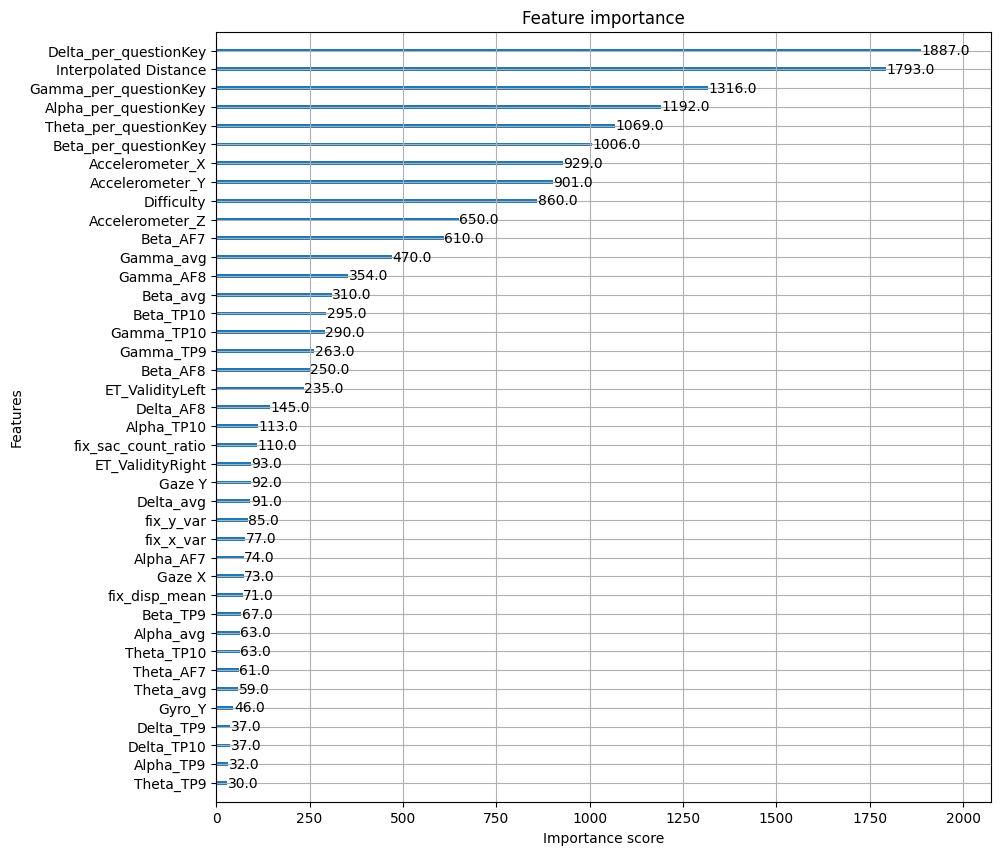

In [180]:
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(best_xgb, max_num_features=40, ax=ax)
plt.show()

In [181]:
import shap

In [182]:
explainer = shap.Explainer(best_xgb)

In [183]:
shap_values = explainer(X.sample(2000, random_state=42))

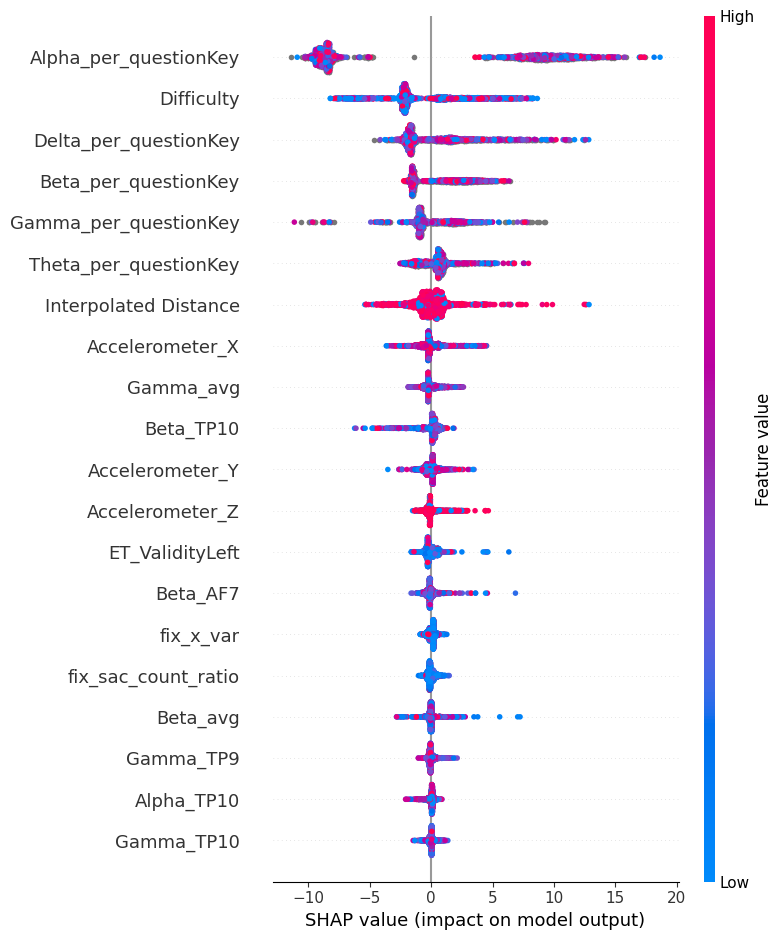

In [184]:
shap.summary_plot(shap_values, X.sample(2000))

**Observation: XGBoost Model Performance with Engineered Features and Hyperparameter Tuning (Full Dataset)**

After performing hyperparameter tuning on the XGBoost model using RandomizedSearchCV with the full dataset, engineered features and top features, the best cross-validation R² achieved is approximately 0.66. The best parameters found during the search were: `{'colsample_bytree': 0.84, 'gamma': 0.28, 'learning_rate': 0.014, 'max_depth': 4, 'min_child_weight': 8, 'n_estimators': 1105, 'reg_alpha': 0.00039, 'reg_lambda': 1.49, 'subsample': 0.85}`.

The feature importance plot and the SHAP summary plot from the best XGBoost model (trained on the full dataset with engineered features and optimized hyperparameters) provide insights into which features are most influential in predicting response time. As observed previously, ``Difficulty`` remains a dominant feature but not that dominant as newly engineered features. Additionally, engineered features such as "Wavelengths per questionKey", ``Interpolted Distance`` and "Accelerometer data" show significant importance, indicating that the average EEG activity within a question period is highly predictive. Several original eye-tracking features like 'Gaze Y', 'fix_y_var', and 'Gaze X' also contribute substantially to the model's predictions. The SHAP values confirm these findings, showing that these features have a strong impact on the predicted response time.

The hyperparameter tuning process resulted in a model with improved generalization ability, as indicated by the cross-validation R² score. The analysis of feature importance and SHAP values highlights the combined predictive power of the original physiological and eye-tracking features, the newly engineered EEG features in determining response time.

In [187]:
new_df.head()

,QuestionKey,Second,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,Student,fix_count,fix_mean_dur,fix_max_dur,fix_total_time,fix_dur_var,fix_disp_mean,fix_disp_max,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_total_time,sac_amp_mean,sac_amp_max,sac_vel_mean,sac_vel_max,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_DistanceLeft,ET_DistanceRight,ET_CameraLeftX,ET_CameraLeftY,ET_CameraRightX,ET_CameraRightY,ET_ValidityLeft,ET_ValidityRight,Difficulty,ResponseTime,Idle,Delta_avg,Theta_avg,Alpha_avg,Beta_avg,Gamma_avg,Delta_per_questionKey,Theta_per_questionKey,Alpha_per_questionKey,Beta_per_questionKey,Gamma_per_questionKey
0,1Item1,0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.917095,0.948536,0.733450,0.626364,0.782861,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.815119,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,1,96.0,311.619409,516.63550,29915.46330,31334.796170,0.175403,0.230429,136402.478510,66467.086301,25.0,53.745926,1343.64815,6.564607,10.472770,202.073094,301.020647,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,581.218575,578.523106,0.595172,0.491192,0.435344,0.489465,0.074380,0.000000,0.0,7.654472,0,1.161676,0.803553,0.851762,0.439639,-0.076735,0.66117,0.42552,0.545446,0.335892,0.054163
1,1Item1,1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.195450,0.856370,0.700926,0.111918,0.414653,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.910748,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,1,116.0,306.353083,466.57240,35536.95765,12692.712854,0.142642,0.174308,249.337145,1857.949767,4.0,12.586613,50.34645,0.290974,0.290974,32.149300,32.865657,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,577.563704,575.995364,0.599371,0.489694,0.439255,0.487500,0.000000,0.066667,0.0,7.654472,0,0.670430,0.383665,0.606515,0.309146,-0.146021,0.66117,0.42552,0.545446,0.335892,0.054163
2,1Item1,2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,-0.491477,0.754324,0.786090,-0.249427,0.031382,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-1.012764,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,1,107.0,346.124971,458.28765,37035.37190,15268.526548,0.196410,0.223791,18768.997145,24199.116250,13.0,42.955415,558.42040,4.124228,6.878161,132.086826,199.644986,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,577.144348,577.198090,0.601159,0.490938,0.441304,0.488363,0.000000,0.016667,0.0,7.654472,0,0.285855,0.059920,0.402571,0.269550,-0.169179,0.66117,0.42552,0.545446,0.335892,0.054163
3,1Item1,3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,-0.402121,0.895805,1.149560,-0.153594,0.028832,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-1.022452,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,1,104.0,601.330480,950.27350,62538.36990,138999.949372,0.147897,0.190084,76207.197913,27947.237737,13.0,36.540588,475.02765,4.120809,6.915322,202.940889,409.901281,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.874069,23.003946,-440.517593,580.660484,577.034957,0.595888,0.490604,0.436279,0.488559,0.016667,0.025000,0.0,7.654472,0,0.678748,0.264870,0.551990,0.365654,-0.077671,0.66117,0.425

In [188]:
new_df['Gaze_X_avg_per_second'] = new_df.groupby(['Second'])['Gaze X'].transform('mean')
new_df['Gaze_Y_avg_per_second'] = new_df.groupby(['Second'])['Gaze Y'].transform('mean')

In [189]:
new_df['fix_sac_time_ratio_per_second'] = new_df.groupby(["Second"])['fix_sac_time_ratio'].transform('mean')

In [190]:
top_features = [
    "Gaze Y", "fix_y_var", "Interpolated Distance", "Alpha_TP9", "Accelerometer_Y",
    "Gaze X", "Accelerometer_X", "Accelerometer_Z", "fix_x_var", "Gyro_Z",
    "Beta_AF7", "Gamma_AF8","Gamma_TP10", "Theta_TP9", "Beta_AF8",
    "Beta_TP10", "Beta_TP9", "Gamma_TP9", "fix_sac_count_ratio", "ET_ValidityLeft",
    "Delta_AF8", "Alpha_TP10", "ET_ValidityRight", "Gyro_Y", "fix_disp_mean",
    "Delta_TP10", "Theta_TP10", "Theta_AF7","Alpha_AF7", "Delta_TP9",
    "Delta_avg", "Theta_avg", "Alpha_avg", "Beta_avg", "Gamma_avg",
    "Delta_per_questionKey", "Theta_per_questionKey", "Alpha_per_questionKey", "Beta_per_questionKey", "Gamma_per_questionKey",
    "Gaze_X_avg_per_second", "Gaze_Y_avg_per_second",
    "fix_sac_time_ratio_per_second",
    "Difficulty"
]


In [191]:
X = new_df[top_features]
y = new_df["ResponseTime"]
groups = new_df["Student"]

In [192]:
best_xgb = XGBRegressor(
    **search.best_params_,
    tree_method='hist',
    device = "cuda",
    # predictor='gpu_predictor',
    # gpu_id=0,
    random_state=42
)

In [193]:
r2_scores = cross_val_score(best_xgb, X, y, cv=cv, groups=groups, scoring='r2')

In [194]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [0.74214269 0.80367822 0.79195235 0.77024674 0.81665043]
Mean R²: 0.784934087444128


In [195]:
best_xgb = XGBRegressor(
    **search.best_params_,
    tree_method='hist',
    device = "cuda",
    # predictor='gpu_predictor',
    # gpu_id=0,
    random_state=42
)

In [196]:
best_xgb.fit(X, y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,np.float64(0.8404460046972835)
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [197]:
import xgboost as xgb

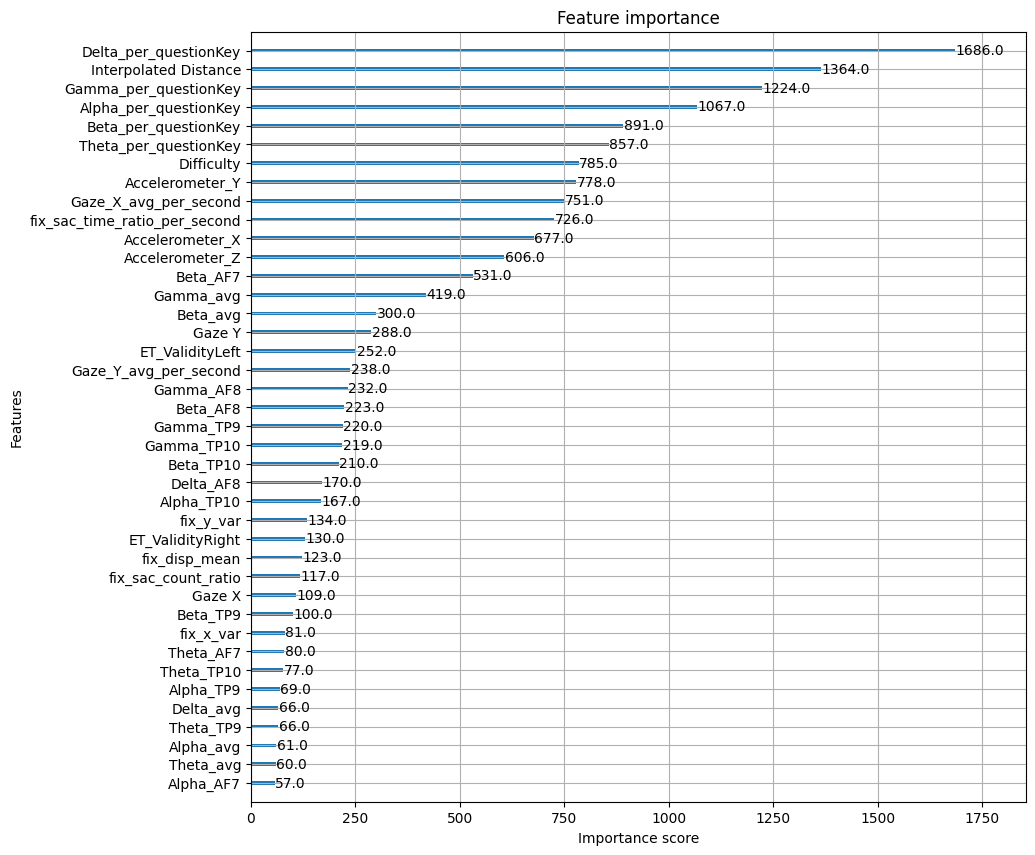

In [198]:
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(best_xgb, max_num_features=40, ax=ax)
plt.show()

In [199]:
import shap

In [200]:
explainer = shap.Explainer(best_xgb)

In [201]:
shap_values = explainer(X.sample(2000, random_state=42))

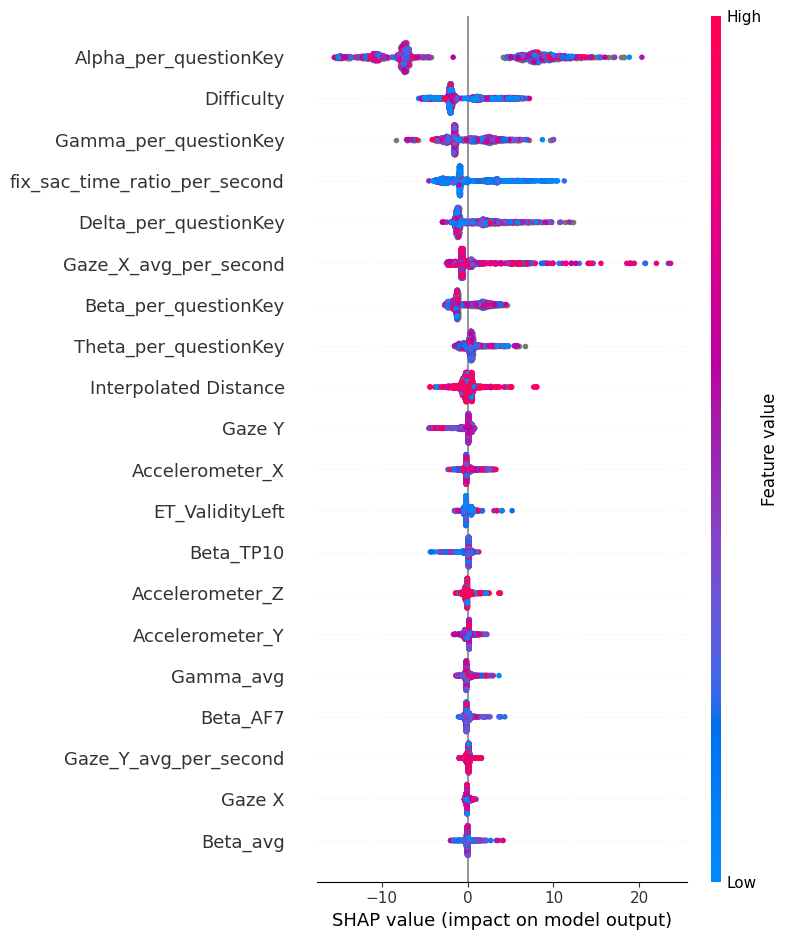

In [202]:
shap.summary_plot(shap_values, X.sample(2000))

**Observation: XGBoost Model Performance with Engineered Features (Full Dataset)**

After engineering new eye-tracking features based on the average per second (`Gaze_X_avg_per_second`, `Gaze_Y_avg_per_second`, and `fix_sac_time_ratio_per_second`) and adding them to the list of top features, the XGBoost model was trained and evaluated on the full dataset.

The mean cross-validation R² score for this model is approximately 0.78, with R² values per fold ranging from 0.74 to 0.82. This represents a significant improvement in predictive performance compared to the previous models, indicating that these newly engineered features, combined with the existing top features and the full dataset, are highly effective in explaining the variance in response time.

The feature importance plot and the SHAP summary plot from this model highlight the most influential features. The newly engineered features, particularly those related to average gaze position and fixation/saccade time ratio per second, show high importance, along with ``Difficulty`` and some of the previously identified important eye-tracking and EEG features. The SHAP values further illustrate how these features contribute to the model's predictions, reinforcing their significance.

The substantial increase in the cross-validation R² score to around 0.78 demonstrates that incorporating these per-second averaged eye-tracking metrics significantly enhances the model's ability to generalize and accurately predict response time. This suggests that analyzing eye movement patterns at a more granular temporal level provides valuable information for this prediction task.

In [215]:
import joblib

In [216]:
joblib.dump(best_xgb, "models/Type_2_models/xgb_model_final.joblib")

['models/Type_2_models/xgb_model_final.joblib']

In [217]:
new_df.to_csv("data/feature_engineered_data/feature_engineered_type_3.csv")